In [1]:
from keras.layers import Conv1D, Input, Activation
from keras.models import Model
import scipy.signal as sp
import numpy as np
import tables
from scipy.io import wavfile
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [59]:
coeff_path='/media/taufiq/Data/heart_sound/feature/filterbankcoeff60.mat'
signal_path='/media/taufiq/Data/heart_sound/Heart_Sound/Physionet/training/training-a/a0001.wav'
coeff=tables.open_file(coeff_path)
b1=coeff.root.b2[:]
b1=np.hstack(b1)
b1=np.reshape(b1,[b1.shape[0],1,1])
print b1.shape
fs,data=wavfile.read(signal_path)

(61, 1, 1)


In [60]:
filtered=sp.filtfilt(b1[:,0,0],[1],data[:2500])

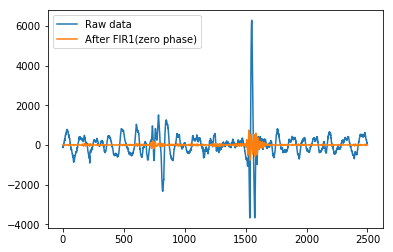

In [61]:
plt.plot(data[:2500],label='Raw data')
plt.plot(filtered,label='After FIR1(zero phase)')
plt.legend()
plt.show()

In [62]:
def FIRnet_w_act(input_size):
    input1=Input(shape=(input_size,1))
    x = Conv1D(1,61,use_bias=False,weights=[b1],padding='same') (input1)
    x = Activation(activation='relu') (x)
    model =Model(input1,x)
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])    
    return model

In [63]:
def FIRnet(input_size):
    input1=Input(shape=(input_size,1))
    x = Conv1D(1,61,use_bias=False, weights=[b1])(input1)
    model =Model(input1,x)
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])    
    return model

In [64]:
model = FIRnet(2500)
t = np.reshape(data[:2500],[1,2500,1])
new_data_ = model.predict(t)

In [65]:
model = FIRnet_w_act(2500)
t = np.reshape(data[:2500],[1,2500,1])
new_data = model.predict(t)

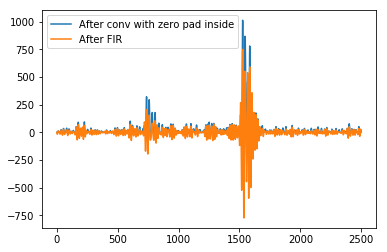

In [66]:
# plt.plot(new_data[0,:,0],label='After conv')
plt.plot(new_data[0,:,0],label='After conv with zero pad inside')
plt.plot(filtered,label='After FIR')
plt.legend()
plt.show()

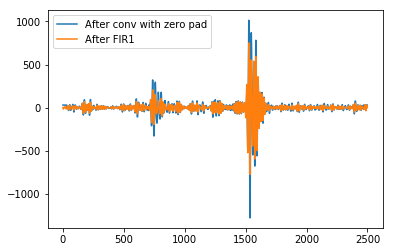

In [67]:
# plt.plot(new_data[0,:,0],label='After conv')
plt.plot(np.pad(new_data_[0,:,0],(30,30),'constant',constant_values=(30, 30)),label='After conv with zero pad')
plt.plot(filtered,label='After FIR1 (zero phase)')
plt.legend()
plt.show()